<h1><center> Practical assignment # 2: convolutional neural networks </center></h1>

1. **Start date**: 12 Apr 2017 (Lecture # 7)
2. **Deadline**: 24 May 2017

### General information on the task:
**Diabetic retinopathy** is a common eye disease affecting more than 93 mln people worldwide and notorious for being one of the major causes of blindness in the working-age population of the developed world. Scientists distinguish 4 stages of the disease differing in their symptoms and influence on human's health. Pregression to vision impairment can be slowed or even averted if diabetic retinopathy is detected in time. However, this can be difficult as the disease often shows few symptoms (stages 1, 2) until it is too late to provide effective treatment (stage 4). Currently, detecting diabetic retinopathy is a time-consuming and manual process that requires a trained clinician to examine and evaluate digital color fundus photos of the retina: 

<tr>
 <td><img src='good.jpeg' width="180"/></td>  stage 0:
 <td><img src='bad.jpeg' width="180"/></td>   stage 4:
</tr>

In 2015, [EyePACS](http://www.eyepacs.com/)  and [California HealthCare Foundation](http://www.chcf.org/) organized a [competition](https://www.kaggle.com/c/diabetic-retinopathy-detection) among data scientists on Kaggle platform. The main goal of this competition was to create a model capable of identifying diabetic retinopathy stage given a color fundus photography as input. To evaluate the quality of the model, a metric called [quadratic weighted kappa](https://www.kaggle.com/c/diabetic-retinopathy-detection#evaluation) was suggested. Quadratic weighted kappa measures correlation between predicted and correct values. The more random the prediction is, the closer kappa is to zero. In contrast, the stronger the positive correlation is, the closer kappa is to unit. Top-10 participants were able to achieve kappa greater than 0.8, the level of performance comparable with that of clinician. 

Inspired by the results of this competition, we decided to propose you a similar task as your 2 assignment. 

### Assignment objectives:

1. Create a convolutional neural network that takes color fundus images as input and predicts the stage of diabetic retinopathy on them.  
2. Assignment will be considered as successfully completed if either quadratic weighted kappa for predictions of your model on test dataset is geater than 0.35 or your results are in TOP-40% of the classroom final rating 

### Datasets: 

This assignment uses preprocessed images of color fundus from [Kaggle competition datasets](https://www.kaggle.com/c/diabetic-retinopathy-detection/data). Preprocessing includes blurring, cropping, and resizing to 512x512. To prevent students from augmenting their training set by publicly available Kaggle test dataset, some color distortions were introduced to the images. These distortions cause funny changes in color palitra, but do not affect training efficiency. Numbers in filenames are ids of people. Left and Right mean left and right eyes (usually there is a strong correlation between stages of two eyes)  

1. Training dataset consists of 35126 images each of which is assigned to one of 5 classes (0 class means a healthy eye). We have already divided training dataset into train and validation parts, but feel free to make your own division. Dataset is available [here](https://yadi.sk/d/mzaFYDgG3GtdV3). Table containing names of files and disease stage per each of the images in .csv format can be taken [here](https://yadi.sk/d/7SFlJS9I3GtgGD)

2. Test dataset is composed of 53576 unclassified images and can be downloaded [here](https://yadi.sk/d/HkdQMqoI3GtcQa)    

### Submitting results:
After Lecture # 8, you will be able to submit your predictions for test dataset images. Predictions should be sent in .csv file with two columns (image: filename without '.jpeg', level: integer number of predicted class). Submission details will be discussed later. 

In [2]:
import pandas as pd
prediction = pd.read_csv('trainLabels.csv', nrows=3)
print prediction

      image  level
0   10_left      0
1  10_right      0
2   13_left      0


## Baseline model

To give you a basic idea of how to approach the assignment, we have prepared a simple baseline model. Below, we guide you through the key steps of its pipeline

1. Download the model and the data. Check that (i) folders data (with subfolders train, test and validation), models and model_params (currently, empty) are in the assignment's main directory, (ii) scripts train.py and evaluate.py as well as .csv file ['trainLabels.csv'](https://yadi.sk/d/7SFlJS9I3GtgGD) are in the main directory, (iii) scripts settings.py (with model's hyperparameters), utils.py, and model.py are in models folder. 
2. Train the model by launching 'python train.py' in the main directory 
3. While training, you will be able to observe training statistics (train_loss, train_acc, val_loss, val_acc) that after finishing the learning process, will be saved in 'history.csv' file. Weights for best models are stored in model_params folder and acquire names refering to their val_acc and epoch when they were recorded.
4. Now you can calculate quadratic weighted kappa for several good models on validation dataset. Below, we demonstrate how to do it by using code from evaluate.py.
5. Take your best model and predict classes for test dataset. Send your predictions to us, as it was described in 'Submitting results'. We took checkpoint weights-improvement-35-0.61.hdf5 for predicting labels of test dataset and obtained kappa = 0.16

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from models.settings import *
from keras.models import model_from_json
from models.utils import quadratic_weighted_kappa

Using TensorFlow backend.


In [4]:
# test data dir
test_data_dir = 'data/validation/'

# read names of images and correct labels for them
correct_data = pd.read_csv('trainLabels.csv')

# create pool of images to be evaluated
image_file_pool = []
image_name_pool = []
class_names = [name for name in os.listdir(test_data_dir)]
for class_name in class_names:
    for file in os.listdir(test_data_dir+class_name+'/'):
        if file.endswith(".jpeg"):
            image_file_pool.append(test_data_dir+class_name+'/'+file)
            image_name_pool.append(file[:-5])

# list of trained models to check
list_of_checkpoints = [ 
"weights-improvement-00-0.19.hdf5",
"weights-improvement-01-0.23.hdf5",
"weights-improvement-02-0.13.hdf5",
"weights-improvement-03-0.24.hdf5",
"weights-improvement-04-0.27.hdf5",
"weights-improvement-05-0.30.hdf5",
"weights-improvement-06-0.35.hdf5",
"weights-improvement-07-0.35.hdf5",
"weights-improvement-08-0.28.hdf5",
"weights-improvement-09-0.27.hdf5",
"weights-improvement-10-0.37.hdf5",
"weights-improvement-11-0.33.hdf5",
"weights-improvement-12-0.35.hdf5",
"weights-improvement-13-0.35.hdf5",
"weights-improvement-14-0.40.hdf5",
"weights-improvement-15-0.33.hdf5",
"weights-improvement-16-0.51.hdf5",
"weights-improvement-17-0.41.hdf5",
"weights-improvement-18-0.44.hdf5",
"weights-improvement-19-0.25.hdf5",
"weights-improvement-20-0.30.hdf5",
"weights-improvement-21-0.38.hdf5",
"weights-improvement-22-0.45.hdf5",
"weights-improvement-23-0.43.hdf5",
"weights-improvement-24-0.55.hdf5",
"weights-improvement-25-0.54.hdf5",
"weights-improvement-26-0.58.hdf5",
"weights-improvement-27-0.55.hdf5",
"weights-improvement-28-0.44.hdf5",
"weights-improvement-29-0.59.hdf5",
"weights-improvement-30-0.48.hdf5",
"weights-improvement-31-0.58.hdf5",
"weights-improvement-32-0.53.hdf5",
"weights-improvement-33-0.61.hdf5",
"weights-improvement-34-0.40.hdf5",
"weights-improvement-35-0.56.hdf5",
"weights-improvement-36-0.50.hdf5",
"weights-improvement-37-0.54.hdf5",
"weights-improvement-38-0.57.hdf5",
"weights-improvement-39-0.68.hdf5",
"weights-improvement-40-0.54.hdf5",
"weights-improvement-41-0.66.hdf5",
"weights-improvement-42-0.60.hdf5",
"weights-improvement-43-0.55.hdf5",
"weights-improvement-44-0.69.hdf5",
"weights-improvement-45-0.53.hdf5",
"weights-improvement-46-0.53.hdf5",
"weights-improvement-47-0.63.hdf5",
"weights-improvement-48-0.54.hdf5",
"weights-improvement-49-0.64.hdf5",
"weights-improvement-50-0.69.hdf5",
"weights-improvement-51-0.50.hdf5",
"weights-improvement-52-0.62.hdf5",
"weights-improvement-53-0.70.hdf5",
"weights-improvement-54-0.51.hdf5",
"weights-improvement-55-0.62.hdf5",
"weights-improvement-56-0.47.hdf5",
"weights-improvement-57-0.62.hdf5",
"weights-improvement-58-0.58.hdf5",
"weights-improvement-59-0.54.hdf5",
"weights-improvement-60-0.59.hdf5",
"weights-improvement-61-0.63.hdf5",
"weights-improvement-62-0.59.hdf5",
"weights-improvement-63-0.58.hdf5",
"weights-improvement-64-0.62.hdf5",
"weights-improvement-65-0.68.hdf5",
"weights-improvement-66-0.61.hdf5",
"weights-improvement-67-0.69.hdf5",
"weights-improvement-68-0.63.hdf5",
"weights-improvement-69-0.65.hdf5",
"weights-improvement-70-0.44.hdf5",
"weights-improvement-71-0.56.hdf5",
"weights-improvement-72-0.60.hdf5",
"weights-improvement-73-0.63.hdf5",
"weights-improvement-74-0.69.hdf5",
"weights-improvement-75-0.62.hdf5",
"weights-improvement-76-0.40.hdf5",
"weights-improvement-77-0.61.hdf5",
"weights-improvement-78-0.62.hdf5",
"weights-improvement-79-0.66.hdf5",
"weights-improvement-80-0.60.hdf5",
"weights-improvement-81-0.51.hdf5",
"weights-improvement-82-0.65.hdf5",
"weights-improvement-83-0.64.hdf5",
"weights-improvement-84-0.59.hdf5",
"weights-improvement-85-0.58.hdf5",
"weights-improvement-86-0.63.hdf5",
"weights-improvement-87-0.61.hdf5",
"weights-improvement-88-0.61.hdf5",
"weights-improvement-89-0.51.hdf5",
"weights-improvement-90-0.52.hdf5",
"weights-improvement-91-0.66.hdf5",
"weights-improvement-92-0.60.hdf5",
"weights-improvement-93-0.64.hdf5",
"weights-improvement-94-0.61.hdf5",
"weights-improvement-95-0.63.hdf5",
"weights-improvement-96-0.55.hdf5",
"weights-improvement-97-0.66.hdf5",
"weights-improvement-98-0.62.hdf5",
"weights-improvement-99-0.55.hdf5" ]


In [5]:
for checkpoint in list_of_checkpoints:
    # load json and create model
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)

    # load model's weights
    model.load_weights(WEIGHTS_DIR + checkpoint)
    
    predicted_label = []
    correct_label = []

    # predict and store labels
    for image_idx in range(len(image_file_pool)):
        img_array = np.array(Image.open(image_file_pool[image_idx]))
        img_array = img_array[None, :]
        predicted_label.append(np.argmax(model.predict(img_array).ravel()))
        correct_label.append(correct_data['level'].loc[correct_data['image'] == image_name_pool[image_idx]].tolist()[0])

    print 'checkpoint {0}: {1:5.4f}'.format(checkpoint, quadratic_weighted_kappa(predicted_label, correct_label))

checkpoint weights-improvement-00-0.19.hdf5: 0.0480
checkpoint weights-improvement-01-0.23.hdf5: 0.0537
checkpoint weights-improvement-02-0.13.hdf5: 0.0335
checkpoint weights-improvement-03-0.24.hdf5: 0.0973
checkpoint weights-improvement-04-0.27.hdf5: 0.0804
checkpoint weights-improvement-05-0.30.hdf5: 0.0888
checkpoint weights-improvement-06-0.35.hdf5: 0.0839
checkpoint weights-improvement-07-0.35.hdf5: 0.0689
checkpoint weights-improvement-08-0.28.hdf5: 0.0752
checkpoint weights-improvement-09-0.27.hdf5: 0.0603
checkpoint weights-improvement-10-0.37.hdf5: 0.1202
checkpoint weights-improvement-11-0.33.hdf5: 0.1010
checkpoint weights-improvement-12-0.35.hdf5: 0.0985
checkpoint weights-improvement-13-0.35.hdf5: 0.1034
checkpoint weights-improvement-14-0.40.hdf5: 0.0936
checkpoint weights-improvement-15-0.33.hdf5: 0.0858
checkpoint weights-improvement-16-0.51.hdf5: 0.1312
checkpoint weights-improvement-17-0.41.hdf5: 0.1120
checkpoint weights-improvement-18-0.44.hdf5: 0.1242
checkpoint w

If you want to plot accuracy chart with quadratic weighted kappa data for each epoch, you need to save your model each epoch (in model.py, change save_best_only=True to False in model_checkpoint) and add names of saved models to list_of_checkpoints above. Then you can augment 'history.csv' file with these data and obtain something like our accuracy chart for the baseline model:

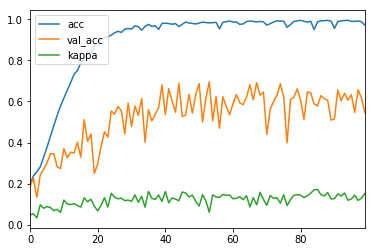

In [8]:
import matplotlib.pyplot as plt
acc_history = pd.read_csv('history.csv', index_col=0)
k_history = pd.read_csv('k_history.csv', header=None)
k_history = k_history.rename(columns={0: 'kappa'})
full_history = pd.concat([acc_history, k_history], axis=1)

plt.figure(); full_history[['acc', 'val_acc', 'kappa']].plot(); plt.show()

From this Figure, it is clear that baseline model is vulnerable to overfitting. 

In [10]:
np.max(k_history['kappa'])

0.17119999999999999

In [11]:
best_checkpoint = "weights-improvement-35-0.56.hdf5"

In [12]:
class_names

['class2', 'class3', 'class1', 'class0', 'class4']

In [13]:
test_image_file_pool = []
test_image_name_pool = []

test_dir = "data/test/"

for file in os.listdir(test_dir):
    if file.endswith(".jpeg"):
        test_image_file_pool.append(test_dir+file)
        test_image_name_pool.append(file[:-5])

In [14]:
from tqdm import tqdm

In [15]:
predicted_label = []
for image_idx in tqdm(range(len(test_image_file_pool))):
        img_array = np.array(Image.open(test_image_file_pool[image_idx]))
        img_array = img_array[None, :]
        predicted_label.append(np.argmax(model.predict(img_array).ravel()))




100%|██████████| 53576/53576 [19:09<00:00, 46.60it/s]


In [16]:
len(predicted_label)

53576

In [17]:
len(test_image_name_pool)

53576

In [18]:
result = pd.DataFrame({
    'image': test_image_name_pool,
    'level':predicted_label
})

In [19]:
result.to_csv('result.csv', index=False)